# XGBoost

Code works when the input data is pandas dataframe with 2 columns where one is a timestamp called "ds" and the other is the actual variable called "y".

In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt

## Data import

In [2]:
prediction_length = 10
end_date = datetime.today()
start_date = end_date - timedelta(days=365)  
apple_stock_price = yf.download("AAPL", start=start_date, end=end_date, interval="1d")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [5]:
apple_stock_price = apple_stock_price.reset_index()
apple_stock_price.columns = ['ds', 'y']

## Data prep

In [6]:
def create_lag_features(df, lag):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['y'].shift(i)
    df.dropna(inplace=True)
    return df

lag = 5  # Number of lag features

df = apple_stock_price

df = create_lag_features(df, lag)

# Split the data into features and target
X = df.drop(columns=['ds', 'y']).values
y = df['y'].values

In [12]:
prediction_length = 10

In [13]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

## Training model

In [14]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluating prediction

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 29.193805089172887


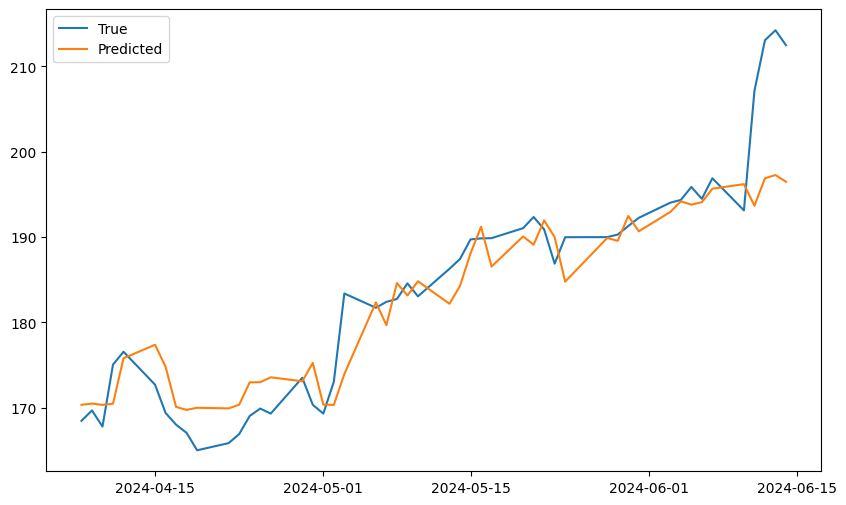

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'].iloc[-len(y_test):], y_test, label='True')
plt.plot(df['ds'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.show()
